# Set up Environment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Load dataset


In [2]:
df = pd.read_csv("/Users/dejicuomu/Desktop/time_serie_visualizer/fcc-forum-pageviews.csv")

In [3]:
# Display basic information about the dataset
df.shape
type(df)

pandas.core.frame.DataFrame

In [4]:
# Convert the 'date' column to datetime format and set it as the index
df = pd.read_csv("/Users/dejicuomu/Desktop/time_serie_visualizer/fcc-forum-pageviews.csv", parse_dates=['date'], index_col='date')

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [7]:
# Filter outliers based on page views
lower_limit = df['value'].quantile(0.025)
upper_limit = df['value'].quantile(0.975)
df = df[(df['value'] >= lower_limit) & (df['value'] <= upper_limit)]

In [8]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


# Visualizing Data


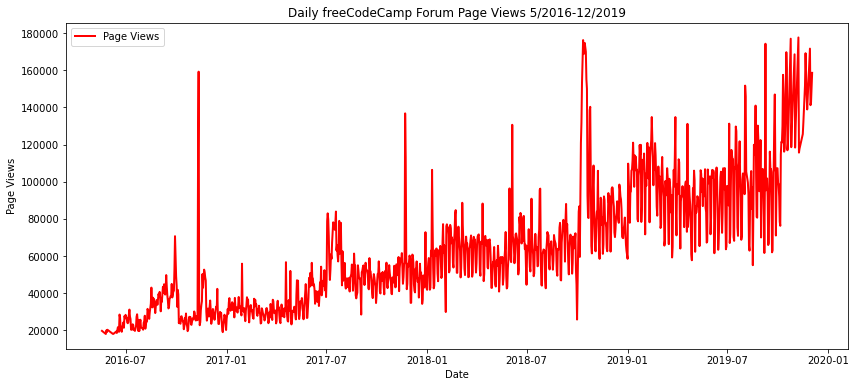

In [9]:
def draw_line_plot():
    # Plot a line graph
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(df.index, df['value'], label='Page Views', color='red', linewidth=2)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.legend()

# Save the plot (if needed)
# plt.savefig('line_plot.png')    
draw_line_plot ()

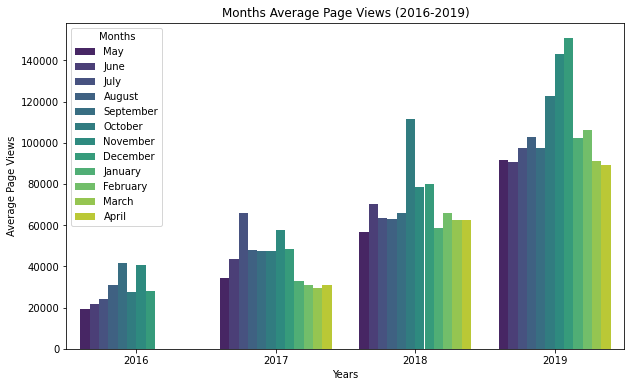

In [10]:
#Draw a bar plot
def draw_bar_plot():
    # Create a copy of the dataset for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    # Plot a bar graph
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x='year', y='value', data=df_bar, hue='month', palette='viridis', ci=None)
    ax.set_title('Months Average Page Views (2016-2019)')
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(title='Months')
    
draw_bar_plot()

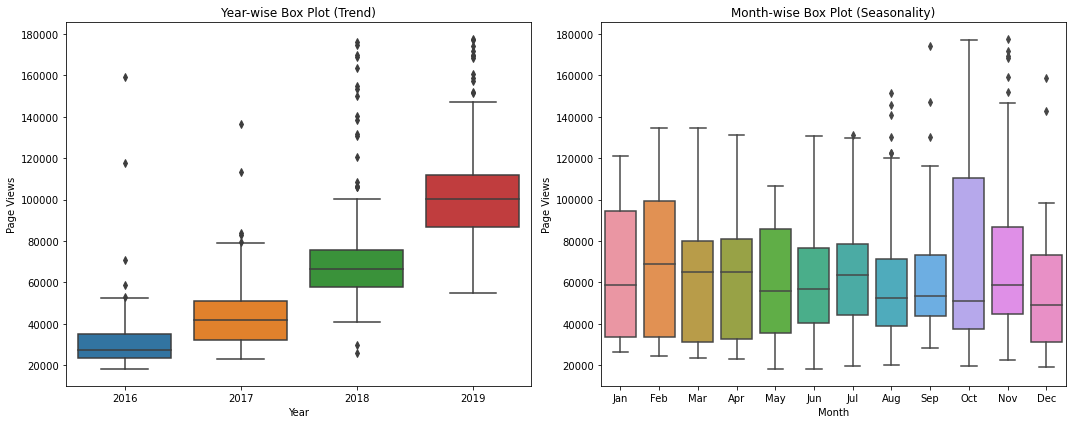

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    #Set up figure and axes for box plots

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Plot Year-wise Box Plot (Trend)
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Plot Month-wise Box Plot (Seasonality)
    sns.boxplot(x='month', y='value', data=df_box, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Adjust layout

    plt.tight_layout()
    
    

draw_box_plot()